Звонок с одной там небольшой [радиостанции](http://echo.msk.ru/) — просят прокомментировать <a href="https://www.facebook.com/andrei.buzin/posts/906714376024441">заявление</a> Андрея Юрьевича Бузина о том, что вероятность получения «Единой Россией» в результате жеребьевки первого места в бюллетенях в 5 субъектах из 13 (как оно на самом деле получилось) чрезвычайно низка — порядка 1/100, <a href="http://top.rbc.ru/politics/26/08/2014/944942.shtml">процитированное РБК</a>. В обычной ситуации я бы, наверное, не осмелился выступать в таком качестве — Андрей Юрьевич является одним из наиболее квалифицированных экспертов по выборам в России и в статистике разбирается лучше меня, так что непонятно, кто я такой, чтобы подтверждать или опровергать его выводы. Но математика тем приятная наука, что здесь выводы однозначно следуют из посылок, и проверить правильность рассуждений может каждый. И я согласился.

С чисто математической точки зрения проблема вот в чём. Есть разные субъекты (всего 13 штук), в каждом из них в выборах участвует свой набор партий — где-то 8 партий, где-то 12, где-то 14. Порядок следования партий в бюллетене в каждом регионе распределяется жребием. Как посчитать вероятность того, что одна конкретная партия займёт первую строчку, например, в пяти любых субъектах? Хорошей точной формулы для этого я не знаю (если бы число партий было одинаковым, это было бы обыкновенное биномиальное распределение и всё можно было посчитать быстро). Можно воспользоваться приближением (вопрос для студентов-первокурсников: каким именно распределением в этом случае нужно использовать в качестве приближения?), можно провести численный эксперимент (как сделал А. Ю. Бузин), но мне хотелось посчитать точно. И я посчитал.
<!-- TEASER_END -->

## Шаг 1: считаем партии
Идём на сайт ЦИК и находим там информацию по партиям, участвующим в выборах. Вот [тут](http://www.cikrf.ru/banners/vib_arhiv/electday/vib_140914/svod_spravka.html). Нам нужно получить массив из 13 элементов (по числу субъектов, в которых проводятся выборы), в каждом написано, сколько партий участвует в соотвтствующих выборах. Можно посчитать глазками и ручками (честно говоря, я так и сделал сначала), а можно использовать регулярные выражения.

In [1]:
import re
# нам нужны регулярные выражения

s="""в Республике Алтай – 631 кандидат выдвинут, 493 зарегистрировано (63-ЕДИНАЯ РОССИЯ, 59-КПРФ, 54-ЛДПР, 47- СПРАВЕДЛИВАЯ РОССИЯ, 46-ПАТРИОТЫ РОССИИ, 24-ЯБЛОКО, 28-РПР-ПАРНАС, 31-ЗЕЛЕНЫЕ, 27-КПСС, 39-ПАРТИЯ ЗА СПРАВЕДЛИВОСТЬ, 36-РОДИНА, 39- ГРАЖДАНСКАЯ ИНИЦИАТИВА),
в Кабардино-Балкарской Республике – 572 кандидата выдвинуто, 433 зарегистрировано (111-ЕДИНАЯ РОССИЯ, 45-КПРФ, 29-ЛДПР, 44-СПРАВЕДЛИВАЯ РОССИЯ, 36-ПАТРИОТЫ РОССИИ, 36-ЯБЛОКО, 49-ЗЕЛЕНЫЕ, 44-РОДИНА, 39- СОЮЗ ТРУДА),
в Карачаево-Черкесской Республике – 516 кандидатов выдвинуто, 339 зарегистрировано (84-ЕДИНАЯ РОССИЯ, 39-КПРФ, 35-ЛДПР, 33-СПРАВЕДЛИВАЯ РОССИЯ, 48-ПАТРИОТЫ РОССИИ, 100-КОММУНИСТЫ РОССИИ),
в Республике Крым – 855 кандидатов выдвинуто, 727 зарегистрировано (74-ЕДИНАЯ РОССИЯ, 59-КПРФ, 65-ЛДПР, 57-СПРАВЕДЛИВАЯ РОССИЯ, 66-ПАТРИОТЫ РОССИИ, 55-ДПР, 57-КОММУНИСТЫ РОССИИ, 57-ЗЕЛЕНЫЕ, 55-КПСС, 57-РОССИЙСКАЯ ПАРТИЯ ПЕНСИОНЕРОВ ЗА СПРАВЕДЛИВОСТЬ, 67-РОДИНА, 58-ПАРТИЯ ВЕТЕРАНОВ),
в Республике Марий Эл – 468 кандидатов выдвинуто, 455 зарегистрировано (81-ЕДИНАЯ РОССИЯ, 79-КПРФ, 47-ЛДПР, 39-СПРАВЕДЛИВАЯ РОССИЯ, 72- КОММУНИСТЫ РОССИИ, 76-ЗЕЛЕНЫЕ, 33-КПСС, 28-РОДИНА),
в Республике Татарстан – 263 кандидатов выдвинуто, 216 зарегистрирован (56-ЕДИНАЯ РОССИЯ, 30-КПРФ, 33-ЛДПР, 46-СПРАВЕДЛИВАЯ РОССИЯ, 6-ЯБЛОКО, 28-КОММУНИСТЫ РОССИИ, 14-РОДИНА, 3-РОДНАЯ ПАРТИЯ),
в Республике Тыва – 202 кандидатов выдвинуто, 176 зарегистрировано (34-ЕДИНАЯ РОССИЯ, 27-КПРФ, 21-ЛДПР, 28-СПРАВЕДЛИВАЯ РОССИЯ, 23-ПАТРИОТЫ РОССИИ, 10-РПР-ПАРНАС, 33- КОММУНИСТЫ РОССИИ),
в Хабаровском крае – 528 кандидатов выдвинуто, 400 зарегистрировано (56-ЕДИНАЯ РОССИЯ, 53-КПРФ, 62-ЛДПР, 47-СПРАВЕДЛИВАЯ РОССИЯ, 41-ЯБЛОКО, 83-КОММУНИСТЫ РОССИИ, 58-РОДИНА),
в Брянской области - 1150 кандидатов выдвинуто, 1132 зарегистрировано (126-ЕДИНАЯ РОССИЯ, 130-КПРФ, 124-ЛДПР, 130-СПРАВЕДЛИВАЯ РОССИЯ, 130- СПРАВЕДЛИВАЯ РОССИЯ, 95-КОММУНИСТЫ РОССИИ, 83-КПСС, 115-РОССИЙСКАЯ ПАРТИЯ ПЕНСИОНЕРОВ ЗА СПРАВЕДЛИВОСТЬ, 120-ГРАЖДАНСКАЯ ПЛАТФОРМА, 119-РОДИНА, 90- ПАРТИЯ ВЕЛИКОЕ ОТЕЧЕСТВО),
в Волгоградской области - 549 кандидатов выдвинуто, 478 зарегистрировано (60-ЕДИНАЯ РОССИЯ, 50-КПРФ, 49-ЛДПР, 48-СПРАВЕДЛИВАЯ РОССИЯ, 39-ПАТРИОТЫ РОССИИ, 31-ЯБЛОКО, 27-АЛЬЯНС ЗЕЛЕНЫХ И СОЦИАЛ-ДЕМОКРАТОВ, 38-КОММУНИСТЫ РОССИИ, 32-НАРОДНАЯ ПАРТИЯ «ЗА ЖЕНЩИН РОССИИ», 27-КПСС, 44-РОДИНА, 33-ПАРТИЯ ВЕЛИКОЕ ОТЕЧЕСТВО),
в Тульской области – 680 кандидатов выдвинуто, 567 зарегистрировано (107-ЕДИНАЯ РОССИЯ, 97-КПРФ, 92-ЛДПР, 57-СПРАВЕДЛИВАЯ РОССИЯ, 51-ЯБЛОКО, 85-РОССИЙСКАЯ ПАРТИЯ ПЕНСИОНЕРОВ ЗА СПРАВДЛИВОСТЬ, 78-РОДИНА),
в городе Севастополе - 289 кандидатов выдвинуто, 266 зарегистрировано (24-ЕДИНАЯ РОССИЯ, 24-КПРФ, 22-ЛДПР, 24-СПРАВЕДЛИВАЯ РОССИЯ, 22-ПАТРИОТЫ РОССИИ, 19-КОММУНИСТЫ РОССИИ, 13-СОЮЗ ГОРОЖАН, 17-КПСС, 16-РОССИЙСКАЯ ПАРТИЯ ПЕНСИОНЕРОВ ЗА СПРАВДЛИВОСТЬ, 24-РОДИНА, 12-ПАРТИЯ ВЕТЕРАНОВ РОССИИ, 20-ПАРТИЯ САДОВОДОВ, 12-ПАРТИЯ ВЕЛИКОЕ ОТЕЧЕСТВО, 17-НАЦИОНАЛЬНЫЙ КУРС),
в Ненецком автономном округе - 118 кандидатов выдвинуто, 99 зарегистрировано (27- ЕДИНАЯ РОССИЯ, 13-КПРФ, 12-ЛДПР, 7-СПРАВЕДЛИВАЯ РОССИЯ, 7-ПАРТИЯ ПЕНСИОНЕРОВ РОССИИ, 11-КОММУНИСТЫ РОССИИ, 11-ГРАЖДАНСКАЯ СИЛА, 11-РОДИНА);"""
#взято со страницы http://www.cikrf.ru/banners/vib_arhiv/electday/vib_140914/svod_spravka.html

num_of_parties=[len(re.findall("\d+-",l)) for l in s.splitlines()]
# мы порезали длинную строку l на отдельные строчки 
# (в каждой строчке информация про один субъект)
# с помощью s.splitlines(), затем в каждом нашли 
# подстроку вида «цифры с последующим знаком -»
# и посчитали их количество (len). Это число партий, 
# баллотирующихся в соответствующем субъекте

In [2]:
num_of_parties
# проверим, что вышло

[12, 9, 6, 12, 8, 8, 7, 7, 11, 12, 7, 14, 8]

In [3]:
N=len(num_of_parties)
# число субъектов

## Шаг 2: считаем вероятности

In [4]:
from numpy import prod
# нам нужна функция, перемножающая элементы списка

def prob_comb(combination):
    """Эта функция считает вероятность того, что какая-то конкретная партия займёт первую строчку
    в субъектах, номера которых перечислены в списке combination
    например, если combination == [0,1], это означает, что будет посчитана вероятность того, что
    какая-то конкретная партия займёт первую строчку в Республике Алтай и Кабардино-Балкарской Республике,
    и не займёт первую строчку во всех остальных субъектах"""
    probs=[1./np for np in num_of_parties]
    # в массиве probs теперь указаны вероятности, 
    # что конкретная партия займёт 
    # первую строчку в каждом из субъектов
    
    return prod([p if i in combination else 1.-p for i,p in enumerate(probs)])
    #здесь написано, что нужно посчитать такое произведение: 
    # для тех субъектов, которые включены
    #в список combination, взять число p 
    # (то есть соответствующую вероятность занять первую строчку),
    #а для тех, которые не включены, взять число 
    # 1-p (дополнительную вероятность).
    #сравните с выводом форулы для биномиального распределения

## Шаг 3: перебираем все сочетания
Чтобы ответить на вопрос «какова вероятность, что конкретная партия получит первое место в 5 субъектах из 13», нужно учесть, что эти 5 субъектов могут выбраны среди 13 разными способами. Например, можно выбрать первые 5 субъектов, или последние 5, или как-то ещё. Как мы знаем из комбинаторики, всего существует $C_{13}^5$ способов это сделать. Но из-за того, что субъекты не равноправны (в разных субъектах разное число партий), вероятности в разных случаях будут разными. Значит, нам нужно перебрать все возможные сочетания, посчитать вероятность каждого и сложить их. К счастью, в Python есть модуль `itertools`, позволяющий работать с такими комбинаторными объектами, как «сочетание».

In [5]:
from itertools import combinations
def prob_n(n):
    """Эта функция возвращает вероятность того, 
    что какая-то конкретная партия
    окажется на первом месте ровно в n регионах
    """
    return sum(prob_comb(comb) for comb in combinations(range(N),n))

## Шаг 4: находим ответ

In [6]:
prob_n(5)

0.0094378355141384075

Итак, вероятность того, что какая-то партия окажется на первом месте ровно в 5 регионах, равна 0,0094 или 0,94%. Но на самом деле было бы более аккуратно посчитать вероятность того, что партия окажется на первом месте _как минимум_ в 5 регионах. (Интересующее нас событие состоит в не том, что регионов оказалось ровно 5, а в том, что их оказалось достаточно много — если бы их было 6 или все 13, то это тоже вызвало бы подозрения.) Это несложно.

In [7]:
sum(prob_n(i) for i in xrange(5,N+1))

0.01125168805590801

Значит искомая вероятность равняется примерно 1,13%, то есть действительно примерно 1 случай из 100!

## Шаг 5: рисуем картинки
А сколько первых мест нам не показалось бы подозрительным? Чтобы ответить на этот вопрос, давайте нарисуем график распределения. Это несложно.

Populating the interactive namespace from numpy and matplotlib


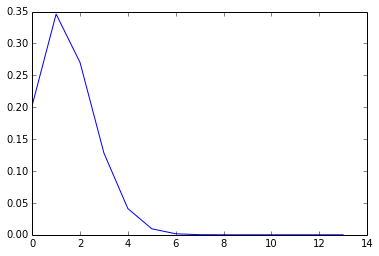

In [8]:
%pylab inline
#нам нужно рисовать графики

plot([prob_n(i) for i in xrange(N+1)])

По графику видно, что значения от 0 до 3 регионов, где конкретная партия заняла первую строчку, не должны вызывать больших подозрений, а дальнейшее отклонение вправо уже выглядит маловероятным.

## Упражнения
Приблизить полученное распределение одним из распределений, которые изучаются обычно в курсе теории вероятностей (угадать, каким), найти соответствующие вероятности и построить графики.